In [7]:
import scipy
import numpy as np
from matplotlib import pyplot as plt

# Visualise the grid graph

In [ ]:
def plot_grid_vertices(
    n_rows: int,
    n_cols: int,
    c: np.ndarray | str = 'black',
    ax: plt.Axes = None,
):
    """
    Plots a grid of points on a 2D plane. Does not include edges.
    """
    if ax is None:
        fig, ax = plt.subplots(figsize=(6, 6))
    
    # Create grid coordinates
    xs, ys = np.meshgrid(np.arange(n_cols), np.arange(n_rows))
    xs, ys = xs.flatten(), ys.flatten()

    # Plot
    ax.scatter(xs, ys, c=c, s=40, )
    
    # Set axes properties
    ax.set_aspect('equal')
    ax.set_xticks(range(n_cols))
    ax.set_yticks(range(n_rows))
    ax.set_xlim(-0.5, n_cols - 0.5)
    ax.set_ylim(-0.5, n_rows - 0.5)

    return ax

<Axes: >

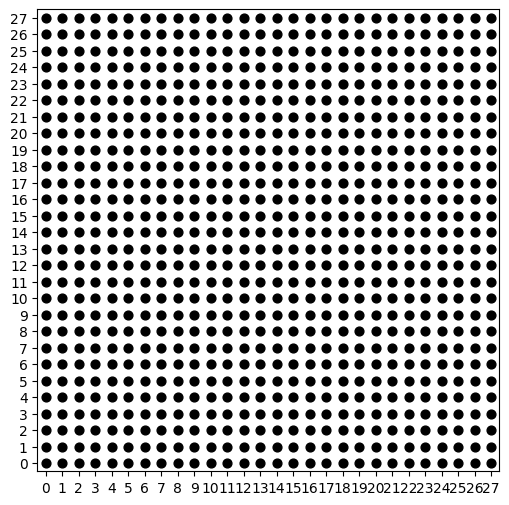

In [35]:
n_rows = 28
n_cols = 28

plot_grid_vertices(n_rows, n_cols)

# Compute the Laplacian and visualise eigenvectors

In [51]:
def grid_laplacian_and_eigenpairs(
    n_rows: int,
    n_cols: int,
    boundary_conditions: str = 'neumann',
):
    """
    Returns the Laplacian matrix and the eigenvectors and eigenvalues of the Laplacian.
    """
    grid_shape = (n_rows, n_cols)
    L = scipy.sparse.linalg.LaplacianNd(
        grid_shape=grid_shape,
        boundary_conditions=boundary_conditions
    )
    eigvecs, eigvals = L.eigenvectors(), L.eigenvalues()
    return L, eigvecs, eigvals


boundary_conditions = 'neumann'
L, eigvecs, eigvals = grid_laplacian_and_eigenpairs(n_rows, n_cols, boundary_conditions)

<Axes: >

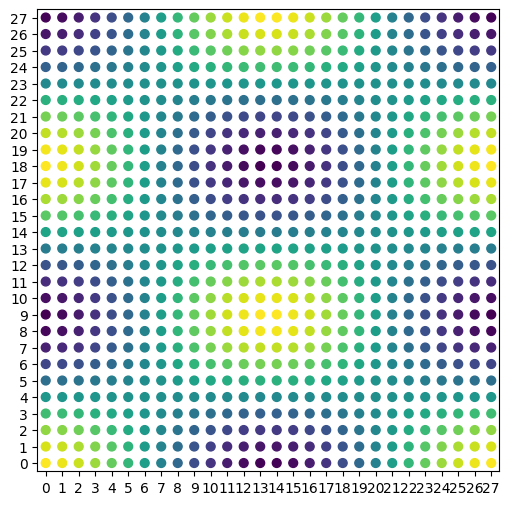

In [54]:
c = eigvecs[:, -15]
plot_grid_vertices(n_rows, n_cols, c=c)